# Oxygen Evals & Analyis: SI, SoG, HC

In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

import cmocean.cm as cm
import copy

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

import datetime as dt
import arrow
import copy
import math
import matplotlib.dates as mdates
import gsw
from mpl_toolkits.basemap import Basemap

In [2]:
mesh = nc.Dataset('/ocean/atall/MOAD/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202108.nc')

meshb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/mesh_mask_202310b.nc')
bathyb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc')
grid = xr.open_dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc', mask_and_scale=False)

depthb = meshb.variables['gdept_0'][:]


In [54]:
#ctd99_16 = pd.read_pickle('/ocean/atall/MOAD/Obs/ecology_fromDakota_UW/ctd_1999_2016_fixed.p')
ctd2018 = pd.read_pickle('/ocean/atall/MOAD/Obs/ecology_fromDakota_UW/ctd_2018_fixed.p')
#ctd2019 = pd.read_pickle('/ocean/atall/MOAD/Obs/ecology_fromDakota_UW/ctd_2019_fixed.p')
sta_df = pd.read_pickle('/ocean/atall/MOAD/Obs/ecology_fromDakota_UW/sta_df.p')

In [55]:
#sta_df
#ctd2018

In [56]:
grid_dir = Path("/ocean/atall/MOAD/grid/")
grid_map = Path("grid_from_lat_lon_mask999.nc")
grid_lons_lats = xr.open_dataset(grid_dir / grid_map)
meshmask = xr.open_dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/mesh_mask_202310b.nc')
tmask = meshmask.tmask
#tmask = tmask.rename({'z' : 'depth', 'y': 'gridY', 'x': 'gridX'})
mbathy = meshmask.mbathy
#grid_lons_lats

In [57]:
j_Eld = grid_lons_lats.jj.sel(lats=47.53787, lons=-123.0096, method='nearest') # 122 m (Obs)
i_Eld = grid_lons_lats.ii.sel(lats=47.53787, lons=-123.0096, method='nearest')
j_Sis = grid_lons_lats.jj.sel(lats=47.356205, lons=-123.02487, method='nearest') # 37 m (Obs)
i_Sis = grid_lons_lats.ii.sel(lats=47.356205, lons=-123.02487, method='nearest')
j_LyC = grid_lons_lats.jj.sel(lats=47.39814833, lons=-122.92959167, method='nearest') # 19 m (Obs)
i_LyC = grid_lons_lats.ii.sel(lats=47.39814833, lons=-122.92959167, method='nearest')
j_Bng = grid_lons_lats.jj.sel(lats=47.67, lons=-122.82, method='nearest') # 95 m (Obs)
i_Bng = grid_lons_lats.ii.sel(lats=47.67, lons=-122.82, method='nearest')
print((j_Eld.item(),i_Eld.item()), (j_Sis.item(),i_Sis.item()), (j_LyC.item(),i_LyC.item()), (j_Bng.item(),i_Bng.item()))

(104, 143) (70, 118) (71, 137) (116, 186)


In [58]:
print(bathyb.variables['Bathymetry'][j_Eld+1, i_Eld], bathyb.variables['Bathymetry'][j_Sis, i_Sis+1], bathyb.variables['Bathymetry'][j_LyC, i_LyC-2], bathyb.variables['Bathymetry'][j_Bng, i_Bng])
j_Eld = j_Eld+1
i_Sis = i_Sis+1
i_LyC = i_LyC-2

142.0 48.3125 21.75 94.6875


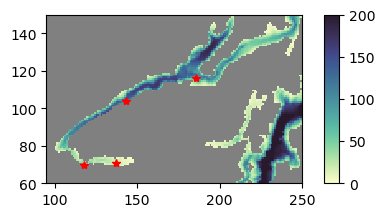

In [59]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(1, 1, figsize=(4, 4))
mycmap = cm.deep
mycmap.set_bad('grey')
im3 = ax.pcolormesh(bathy.variables['Bathymetry'][:], cmap=mycmap, vmin=0, vmax=200)
viz_tools.set_aspect(ax);
ax.plot(143, 104, 'r*')
ax.plot(118, 70, 'r*')
ax.plot(137, 71, 'r*')
ax.plot(186, 116, 'r*')
ax.set_xlim([95, 250])
ax.set_ylim([60, 150])
divider3 = make_axes_locatable(ax)
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax3, orientation='vertical')

/tmp/ipykernel_983217/3239036329.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmo = plt.cm.get_cmap('RdYlBu')


Text(0.5, 0.98, 'Lynch Cove')

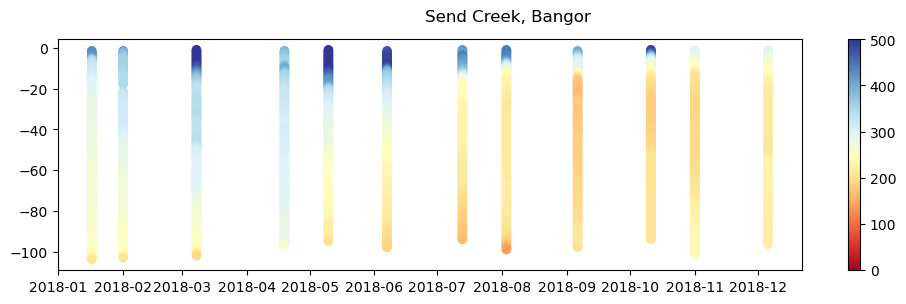

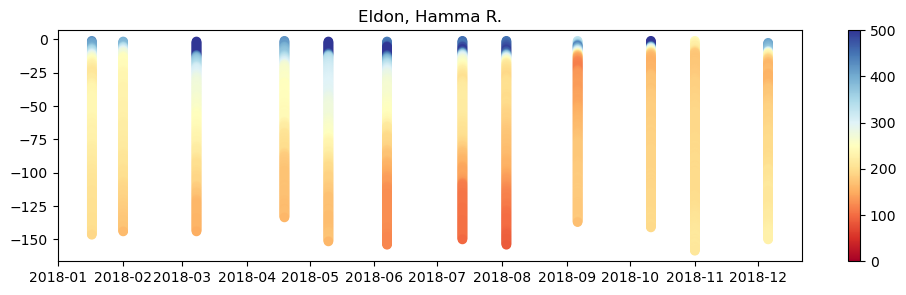

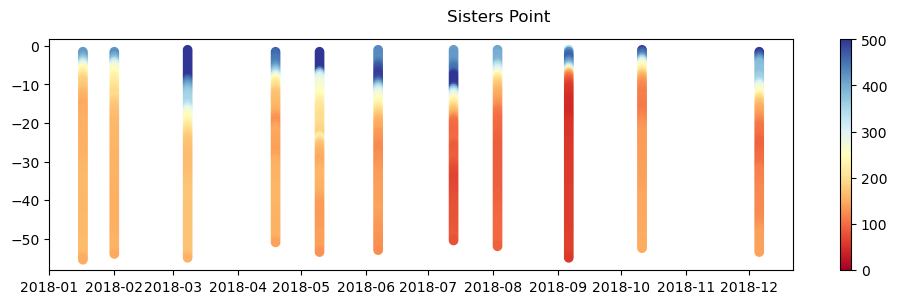

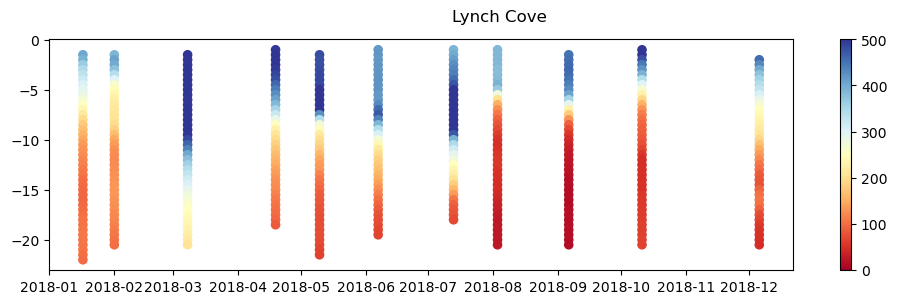

In [60]:
#ctd2018 = ctd99_16
sdate = '2018-01-01 00:00:00'
edate = '2018-12-31 23:59:59'
cmo = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
x = ctd2018.Date[(ctd2018.Station=='HCB010') & (ctd2018.Date.between(sdate, edate))]
y = -ctd2018.Depth[(ctd2018.Station=='HCB010') & (ctd2018.Date.between(sdate, edate))]
z = ctd2018.DO_adjusted[(ctd2018.Station=='HCB010') & (ctd2018.Date.between(sdate, edate))] * 44.661
sc = ax.scatter(x, y, c=z, vmin=0, vmax=500, s=35, cmap=cmo)
plt.colorbar(sc)
fig.suptitle('Send Creek, Bangor')
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
x = ctd2018.Date[(ctd2018.Station=='HCB003') & (ctd2018.Date.between(sdate, edate))]
y = -ctd2018.Depth[(ctd2018.Station=='HCB003') & (ctd2018.Date.between(sdate, edate))]
z = ctd2018.DO_adjusted[(ctd2018.Station=='HCB003') & (ctd2018.Date.between(sdate, edate))] * 44.661
sc = ax.scatter(x, y, c=z, vmin=0, vmax=500, s=35, cmap=cmo)
plt.colorbar(sc)
ax.set_title('Eldon, Hamma R.')
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
x = ctd2018.Date[(ctd2018.Station=='HCB004') & (ctd2018.Date.between(sdate, edate))]
y = -ctd2018.Depth[(ctd2018.Station=='HCB004') & (ctd2018.Date.between(sdate, edate))]
z = ctd2018.DO_adjusted[(ctd2018.Station=='HCB004') & (ctd2018.Date.between(sdate, edate))] * 44.661
sc = ax.scatter(x, y, c=z, vmin=0, vmax=500, s=35, cmap=cmo)
plt.colorbar(sc)
fig.suptitle('Sisters Point')
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
x = ctd2018.Date[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))]
y = -ctd2018.Depth[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))]
z = ctd2018.DO_adjusted[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))] * 44.661
sc = ax.scatter(x, y, c=z, vmin=0, vmax=500, s=35, cmap=cmo)
plt.colorbar(sc)
fig.suptitle('Lynch Cove')
#ax.plot(ctd2018.Date[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))], ctd2018.DO_adjusted[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))] * 44.661, '.')

# 11 Profiles in 2018 (Lynch Cove): 17 Jan; 1st Feb; 8 Mar; 19 Apr; 10 May; 7 Jun; 13 Jul; 3 Aug; 6 Sep; 11 Oct; 6 Dec 

In [61]:
sday = ['17','01','08','19','10','07','13','03','06','11','06']
month = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','dec']
imonth = ['01','02','03','04','05','06','07','08','09','10','12']
start = 0
for it, ii in enumerate(range(4, 5)):
    v202111_chem = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_chem_T.nc')
    v202111_phys = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_grid_T.nc')
    firstru_chem = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxygen_firstrun/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_chem_T.nc')
    firstru_phys = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxygen_firstrun/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_grid_T.nc')
    secondr_chem = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxygen_secondrun/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_chem_T.nc')
    secondr_phys = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxygen_secondrun/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_grid_T.nc')
    mixing1_chem = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxy_mix1/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_chem_T.nc')
    mixing1_phys = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxy_mix1/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_grid_T.nc')
    mixing2_chem = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxygen/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_chem_T.nc')
    mixing2_phys = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxygen/{sday[ii]}{month[ii]}18/SalishSea_1d_2018{imonth[ii]}{sday[ii]}_2018{imonth[ii]}{sday[ii]}_grid_T.nc')
    print(ii)

4


Text(0.5, 0.98, 'Lynch Cove')

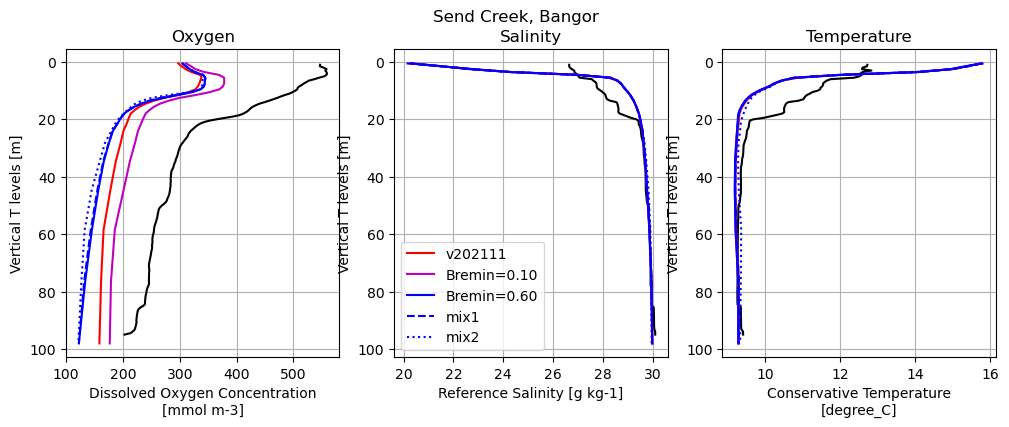

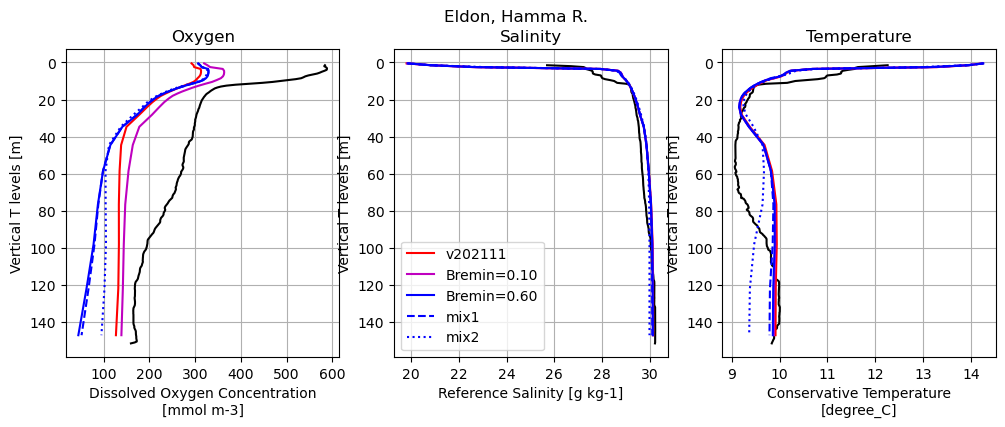

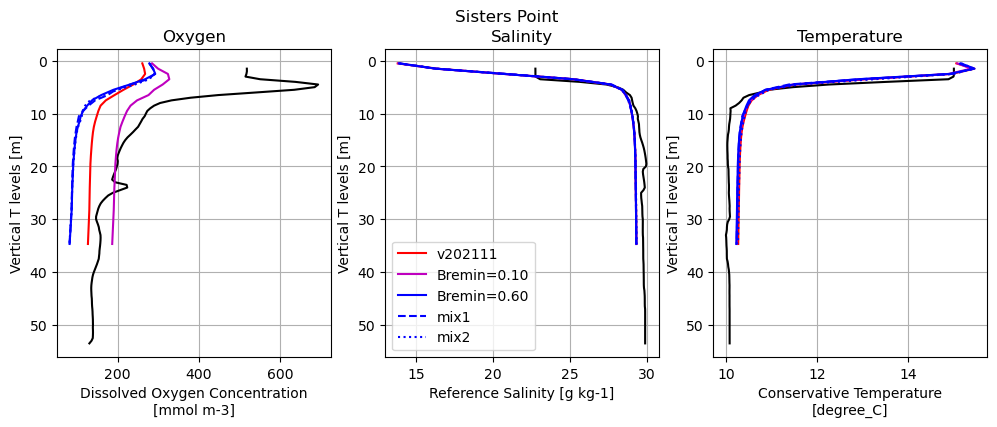

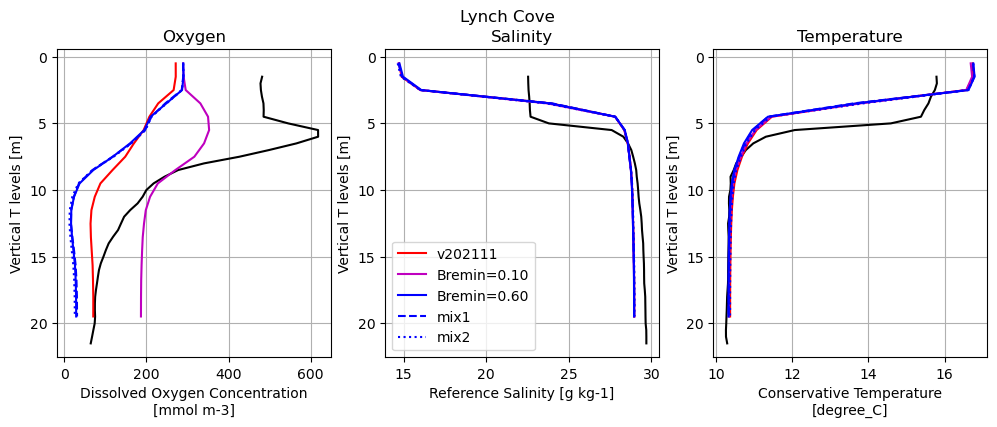

In [62]:
sdate = '2018-05-01 00:00:00'
edate = '2018-05-28 23:59:59'
k1 = 29
k2 = 23
k3 = 27
k = 19
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(ctd2018.DO_adjusted[(ctd2018.Station=='HCB010') & (ctd2018.Date.between(sdate, edate))] * 44.661, ctd2018.Depth[(ctd2018.Station=='HCB010') & (ctd2018.Date.between(sdate, edate))], 'k')
v202111_chem['dissolved_oxygen'][0, :k3, j_Bng, i_Bng].plot(ax=ax[0], y="deptht", yincrease=False, color='r',label='v202111')
firstru_chem['dissolved_oxygen'][0, :k3, j_Bng, i_Bng].plot(ax=ax[0], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_chem['dissolved_oxygen'][0, :k3, j_Bng, i_Bng].plot(ax=ax[0], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_chem['dissolved_oxygen'][0, :k3, j_Bng, i_Bng].plot(ax=ax[0], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_chem['dissolved_oxygen'][0, :k3, j_Bng, i_Bng].plot(ax=ax[0], y="deptht", yincrease=False, color='b',linestyle='dotted',label='mix2')
ax[1].plot(ctd2018.Salinity[(ctd2018.Station=='HCB010') & (ctd2018.Date.between(sdate, edate))], ctd2018.Depth[(ctd2018.Station=='HCB010') & (ctd2018.Date.between(sdate, edate))],'k')
v202111_phys['vosaline'][0, :k3, j_Bng, i_Bng].plot(ax=ax[1], y="deptht", yincrease=False, color='r',label='v202111')
firstru_phys['vosaline'][0, :k3, j_Bng, i_Bng].plot(ax=ax[1], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_phys['vosaline'][0, :k3, j_Bng, i_Bng].plot(ax=ax[1], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_phys['vosaline'][0, :k3, j_Bng, i_Bng].plot(ax=ax[1], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_phys['vosaline'][0, :k3, j_Bng, i_Bng].plot(ax=ax[1], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[2].plot(ctd2018.Temp[(ctd2018.Station=='HCB010') & (ctd2018.Date.between(sdate, edate))], ctd2018.Depth[(ctd2018.Station=='HCB010') & (ctd2018.Date.between(sdate, edate))],'k')
v202111_phys['votemper'][0, :k3, j_Bng, i_Bng].plot(ax=ax[2], y="deptht", yincrease=False, color='r',label='v202111')
firstru_phys['votemper'][0, :k3, j_Bng, i_Bng].plot(ax=ax[2], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_phys['votemper'][0, :k3, j_Bng, i_Bng].plot(ax=ax[2], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_phys['votemper'][0, :k3, j_Bng, i_Bng].plot(ax=ax[2], y="deptht", yincrease=False, color='b',linestyle='dashed',label='Mmx1')
mixing2_phys['votemper'][0, :k3, j_Bng, i_Bng].plot(ax=ax[2], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
ax[0].set_title('Oxygen')
ax[1].set_title('Salinity')
ax[2].set_title('Temperature')
fig.suptitle('Send Creek, Bangor')
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(ctd2018.DO_adjusted[(ctd2018.Station=='HCB003') & (ctd2018.Date.between(sdate, edate))] * 44.661, ctd2018.Depth[(ctd2018.Station=='HCB003') & (ctd2018.Date.between(sdate, edate))], 'k')
v202111_chem['dissolved_oxygen'][0, :k1, j_Eld, i_Eld].plot(ax=ax[0], y="deptht", yincrease=False, color='r',label='v202111')
firstru_chem['dissolved_oxygen'][0, :k1, j_Eld, i_Eld].plot(ax=ax[0], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_chem['dissolved_oxygen'][0, :k1, j_Eld, i_Eld].plot(ax=ax[0], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_chem['dissolved_oxygen'][0, :k1, j_Eld, i_Eld].plot(ax=ax[0], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_chem['dissolved_oxygen'][0, :k1, j_Eld, i_Eld].plot(ax=ax[0], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[1].plot(ctd2018.Salinity[(ctd2018.Station=='HCB003') & (ctd2018.Date.between(sdate, edate))], ctd2018.Depth[(ctd2018.Station=='HCB003') & (ctd2018.Date.between(sdate, edate))],'k')
v202111_phys['vosaline'][0, :k1, j_Eld, i_Eld].plot(ax=ax[1], y="deptht", yincrease=False, color='r',label='v202111')
firstru_phys['vosaline'][0, :k1, j_Eld, i_Eld].plot(ax=ax[1], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_phys['vosaline'][0, :k1, j_Eld, i_Eld].plot(ax=ax[1], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_phys['vosaline'][0, :k1, j_Eld, i_Eld].plot(ax=ax[1], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_phys['vosaline'][0, :k1, j_Eld, i_Eld].plot(ax=ax[1], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[2].plot(ctd2018.Temp[(ctd2018.Station=='HCB003') & (ctd2018.Date.between(sdate, edate))], ctd2018.Depth[(ctd2018.Station=='HCB003') & (ctd2018.Date.between(sdate, edate))],'k')
v202111_phys['votemper'][0, :k1, j_Eld, i_Eld].plot(ax=ax[2], y="deptht", yincrease=False, color='r',label='v202111')
firstru_phys['votemper'][0, :k1, j_Eld, i_Eld].plot(ax=ax[2], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_phys['votemper'][0, :k1, j_Eld, i_Eld].plot(ax=ax[2], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_phys['votemper'][0, :k1, j_Eld, i_Eld].plot(ax=ax[2], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_phys['votemper'][0, :k1, j_Eld, i_Eld].plot(ax=ax[2], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
ax[0].set_title('Oxygen')
ax[1].set_title('Salinity')
ax[2].set_title('Temperature')
fig.suptitle('Eldon, Hamma R.')
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(ctd2018.DO_adjusted[(ctd2018.Station=='HCB004') & (ctd2018.Date.between(sdate, edate))] * 44.661, ctd2018.Depth[(ctd2018.Station=='HCB004') & (ctd2018.Date.between(sdate, edate))], 'k')
v202111_chem['dissolved_oxygen'][0, :k2, j_Sis, i_Sis].plot(ax=ax[0], y="deptht", yincrease=False, color='r',label='v202111')
firstru_chem['dissolved_oxygen'][0, :k2, j_Sis, i_Sis].plot(ax=ax[0], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_chem['dissolved_oxygen'][0, :k2, j_Sis, i_Sis].plot(ax=ax[0], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_chem['dissolved_oxygen'][0, :k2, j_Sis, i_Sis].plot(ax=ax[0], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_chem['dissolved_oxygen'][0, :k2, j_Sis, i_Sis].plot(ax=ax[0], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[1].plot(ctd2018.Salinity[(ctd2018.Station=='HCB004') & (ctd2018.Date.between(sdate, edate))], ctd2018.Depth[(ctd2018.Station=='HCB004') & (ctd2018.Date.between(sdate, edate))],'k')
v202111_phys['vosaline'][0, :k2, j_Sis, i_Sis].plot(ax=ax[1], y="deptht", yincrease=False, color='r',label='v202111')
firstru_phys['vosaline'][0, :k2, j_Sis, i_Sis].plot(ax=ax[1], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_phys['vosaline'][0, :k2, j_Sis, i_Sis].plot(ax=ax[1], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_phys['vosaline'][0, :k2, j_Sis, i_Sis].plot(ax=ax[1], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_phys['vosaline'][0, :k2, j_Sis, i_Sis].plot(ax=ax[1], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[2].plot(ctd2018.Temp[(ctd2018.Station=='HCB004') & (ctd2018.Date.between(sdate, edate))], ctd2018.Depth[(ctd2018.Station=='HCB004') & (ctd2018.Date.between(sdate, edate))],'k')
v202111_phys['votemper'][0, :k2, j_Sis, i_Sis].plot(ax=ax[2], y="deptht", yincrease=False, color='r',label='v202111')
firstru_phys['votemper'][0, :k2, j_Sis, i_Sis].plot(ax=ax[2], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_phys['votemper'][0, :k2, j_Sis, i_Sis].plot(ax=ax[2], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_phys['votemper'][0, :k2, j_Sis, i_Sis].plot(ax=ax[2], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_phys['votemper'][0, :k2, j_Sis, i_Sis].plot(ax=ax[2], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
ax[0].set_title('Oxygen')
ax[1].set_title('Salinity')
ax[2].set_title('Temperature')
fig.suptitle('Sisters Point')
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(ctd2018.DO_adjusted[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))] * 44.661, ctd2018.Depth[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))], 'k')
v202111_chem['dissolved_oxygen'][0, :k, j_LyC, i_LyC].plot(ax=ax[0], y="deptht", yincrease=False, color='r',label='v202111')
firstru_chem['dissolved_oxygen'][0, :k, j_LyC, i_LyC].plot(ax=ax[0], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_chem['dissolved_oxygen'][0, :k, j_LyC, i_LyC].plot(ax=ax[0], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_chem['dissolved_oxygen'][0, :k, j_LyC, i_LyC].plot(ax=ax[0], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_chem['dissolved_oxygen'][0, :k, j_LyC, i_LyC].plot(ax=ax[0], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[1].plot(ctd2018.Salinity[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))], ctd2018.Depth[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))],'k')
v202111_phys['vosaline'][0, :k, j_LyC, i_LyC].plot(ax=ax[1], y="deptht", yincrease=False, color='r',label='v202111')
firstru_phys['vosaline'][0, :k, j_LyC, i_LyC].plot(ax=ax[1], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_phys['vosaline'][0, :k, j_LyC, i_LyC].plot(ax=ax[1], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_phys['vosaline'][0, :k, j_LyC, i_LyC].plot(ax=ax[1], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_phys['vosaline'][0, :k, j_LyC, i_LyC].plot(ax=ax[1], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[2].plot(ctd2018.Temp[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))], ctd2018.Depth[(ctd2018.Station=='HCB007') & (ctd2018.Date.between(sdate, edate))],'k')
v202111_phys['votemper'][0, :k, j_LyC, i_LyC].plot(ax=ax[2], y="deptht", yincrease=False, color='r',label='v202111')
firstru_phys['votemper'][0, :k, j_LyC, i_LyC].plot(ax=ax[2], y="deptht", yincrease=False, color='m',label='Bremin=0.10')
secondr_phys['votemper'][0, :k, j_LyC, i_LyC].plot(ax=ax[2], y="deptht", yincrease=False, color='b',label='Bremin=0.60')
mixing1_phys['votemper'][0, :k, j_LyC, i_LyC].plot(ax=ax[2], y="deptht", yincrease=False, color='b',linestyle='dashed',label='mix1')
mixing2_phys['votemper'][0, :k, j_LyC, i_LyC].plot(ax=ax[2], y="deptht", yincrease=False, color='b', linestyle='dotted',label='mix2')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
ax[0].set_title('Oxygen')
ax[1].set_title('Salinity')
ax[2].set_title('Temperature')
fig.suptitle('Lynch Cove')